In [3]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set_theme()

In [7]:
from cnn import Sequential 
from cnn.layers import Linear, ReLU, Softmax
from cnn.loss import CrossEntropyLoss
from cnn.optim import Adam
from cnn.utils import generate_spiral_data, plot_spiral_data_decision_boundary, train_val_test_split, train_val, plot_train_val, test

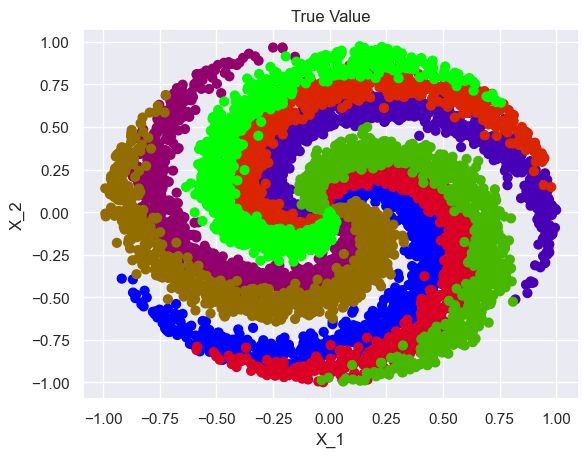

In [12]:
N = 1000 # number of points per class
D = 2 # dimensionality
K = 8 # number of classes
X, y = generate_spiral_data(N, D, K)
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y)

In [15]:
ordered_layers = [
      Linear(D, 256),
      ReLU(),
      Linear(256, 64),
      ReLU(),
      Linear(64, K),
      Softmax()
    ]

loss = CrossEntropyLoss()
optim = Adam()
model = Sequential(
  layers=ordered_layers,
  loss_func = loss,
  optimizer = optim
)
EPOCHS = 100
batch_size = 32
train_losses, train_accuracies, val_losses, val_accuracies = train_val(model, X_train, y_train, X_val, y_val, epochs=EPOCHS, verbose_freq = 10)

Epoch 10, Train Loss: 0.372431, Train Accuracy: 0.849464, Val Loss: 0.351601, Val Accuracy: 0.857500
Epoch 20, Train Loss: 0.346581, Train Accuracy: 0.861429, Val Loss: 0.375579, Val Accuracy: 0.850833
Epoch 30, Train Loss: 0.336926, Train Accuracy: 0.864107, Val Loss: 0.349172, Val Accuracy: 0.860000
Epoch 40, Train Loss: 0.332519, Train Accuracy: 0.865714, Val Loss: 0.314479, Val Accuracy: 0.869167
Epoch 50, Train Loss: 0.326741, Train Accuracy: 0.866429, Val Loss: 0.323463, Val Accuracy: 0.871667
Epoch 60, Train Loss: 0.322447, Train Accuracy: 0.866964, Val Loss: 0.299678, Val Accuracy: 0.877500
Epoch 70, Train Loss: 0.316904, Train Accuracy: 0.869821, Val Loss: 0.299332, Val Accuracy: 0.874167
Epoch 80, Train Loss: 0.306234, Train Accuracy: 0.875000, Val Loss: 0.300001, Val Accuracy: 0.880000
Epoch 90, Train Loss: 0.304422, Train Accuracy: 0.875536, Val Loss: 0.300645, Val Accuracy: 0.876667
Epoch 100, Train Loss: 0.299493, Train Accuracy: 0.876071, Val Loss: 0.295337, Val Accuracy

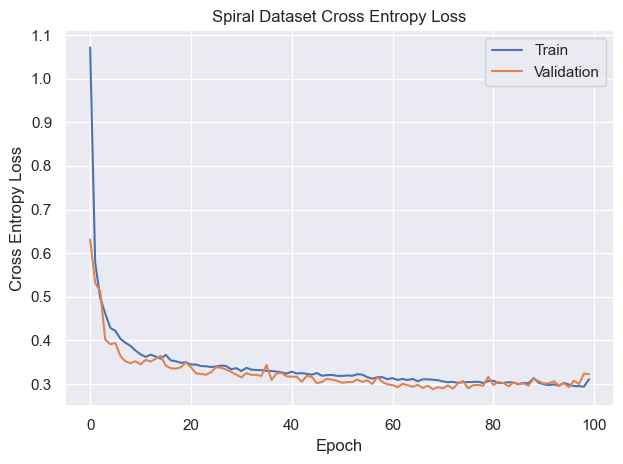

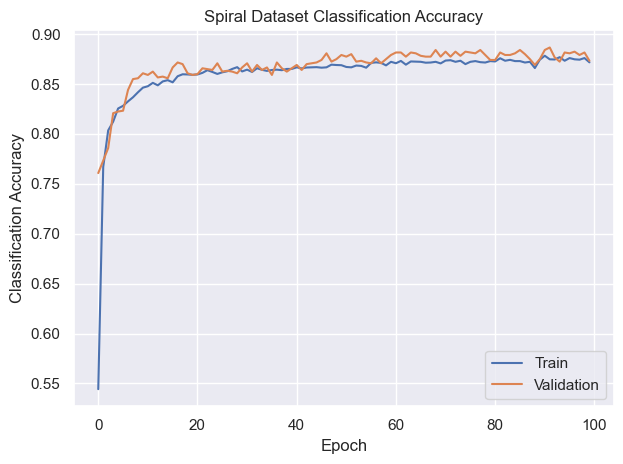

In [14]:
plot_train_val(train_losses, train_accuracies, val_losses, val_accuracies, 'Spiral Dataset')

In [8]:
test_loss, test_accuracy = test(model, X_test, y_test)

Test Loss: 0.327143, Test Accuracy: 0.889167


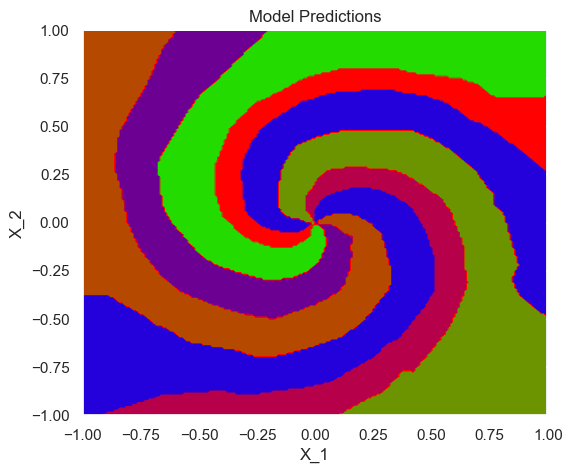

In [9]:
plot_spiral_data_decision_boundary(model)